# Mac vs Windows Comparison of NMDAα Training Runs

In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [454]:
# Import data
mac = pd.read_csv('mac_run1.csv')
mac.insert(1, "platform", "Mac")

win = pd.read_csv('windows_run1.csv')
win.insert(1, "platform", "Windows")

# Merge data
files = [mac, win]
df = pd.concat(files) 

# Drop columns
df = df.drop(columns=['runtime', 'timestamp'])
df

,step,platform,train_working_memory_error,val_reference_memory_error,val_tot_error,learning rate,val_working_memory_error,train_reference_memory_error,loss,train_tot_error
0,1,Mac,0.659692,0.905072,0.687988,9.950000e-05,0.606891,0.901076,2.050030,0.724701
1,2,Mac,0.430694,0.895304,0.447205,9.900000e-05,0.277345,0.900122,1.494592,0.559784
2,3,Mac,0.205166,0.898338,0.342438,9.850000e-05,0.136970,0.893333,1.112995,0.395752
3,4,Mac,0.128758,0.900234,0.319427,9.800000e-05,0.100811,0.896873,0.960734,0.340149
4,5,Mac,0.106974,0.898623,0.314575,9.750000e-05,0.093216,0.891516,0.908209,0.323700
...,...,...,...,...,...,...,...,...,...,...
195,196,Windows,0.000251,0.893498,0.243561,2.000000e-06,0.000461,0.078288,0.068970,0.021454
196,197,Windows,0.000042,0.896521,0.244232,1.500000e-06,0.000629,0.077447,0.066286,0.021179
197,198,Windows,0.000294,0.898857,0.243011,1.000000e-06,0.000752,0.085823,0.073987,0.023712
198,199,Windows,0.000251,0.899353,0.250854,5.000000e-07,0.000719,0.073124,0.064970,0.019928


## Comparison of Loss and Runtime

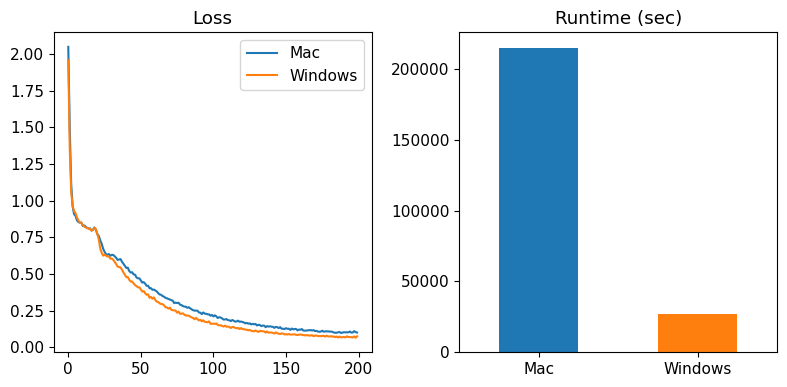

In [451]:
# Loss
loss = {'Mac': mac['loss'], 'Windows': win['loss']}

# Runtime
rtm = 215103  # Mac: 2d 11h 45m 3s
rtw = 26974 # Windows: 7h 29m 34s
runtime = [215103, 26974]

# DataFrames of loss and runtime
df1 = pd.DataFrame(loss)
df2 = pd.DataFrame({'Platform': ['Mac', 'Windows'], 
                   'Runtime': runtime},
                   index = ['Mac', 'Windows']) 

# Plot data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8, 4))

colors = ['tab:blue', 'tab:orange']

font = {'size': 11}
plt.rc('font', **font)

df1.plot(title='Loss', ax=axes[0])
df2.plot.bar(x='Platform', y='Runtime', 
             title='Runtime (sec)', ax=axes[1], 
             color={colors[0],colors[1]}
             )

axes[1].xaxis.label.set_visible(False)
axes[1].get_xaxis().set_ticks([])
axes[1].set_xticks(np.arange(len(runtime)), labels=('Mac', 'Windows'), rotation=0)
axes[1].get_legend().remove()

fig.tight_layout()

# Comparison of overall performance

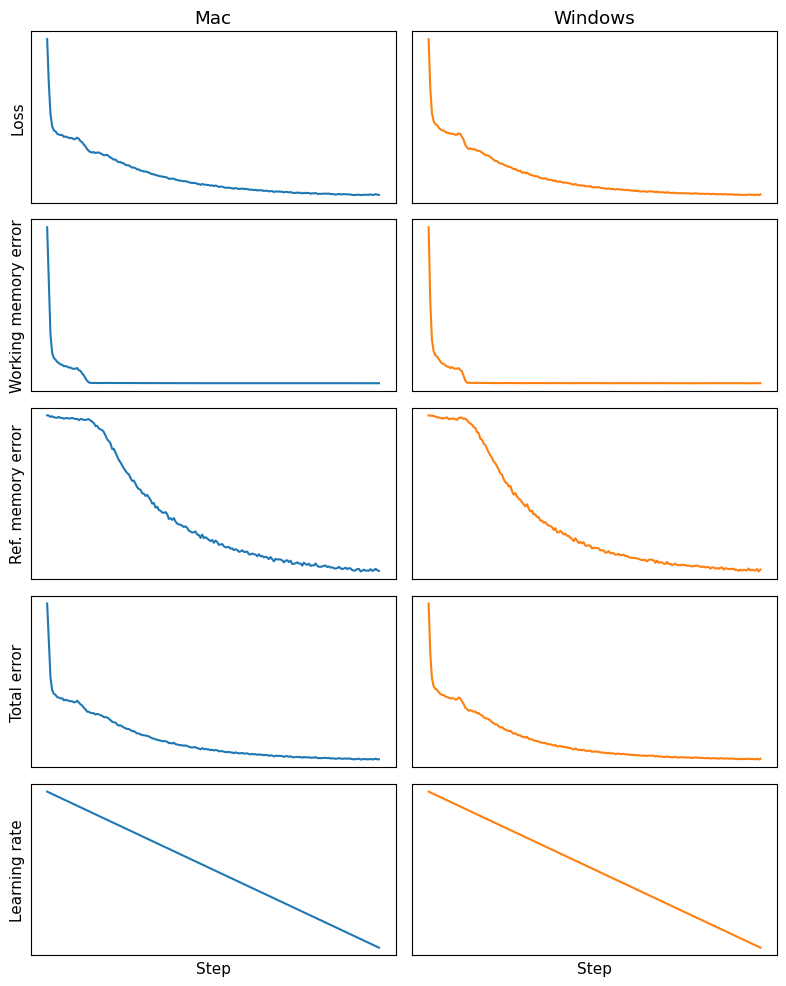

In [459]:
# Plot small multiples
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, figsize = (8, 10))

font = {'size': 11}
plt.rc('font', **font)

# Loss
axes[0,0].plot(mac['step'], mac['loss'], color = colors[0])
axes[0,1].plot(win['step'], win['loss'], color= colors[1])

axes[0,0].set(xlabel='Step', ylabel='Loss')
axes[0,1].set(xlabel='Step', ylabel='Loss')

# train_working_memory_error
axes[1,0].plot(mac['step'], mac['train_working_memory_error'], color = colors[0])
axes[1,1].plot(win['step'], win['train_working_memory_error'], color= colors[1])

axes[1,0].set(xlabel='Step', ylabel='Working memory error')
axes[1,1].set(xlabel='Step', ylabel='Working memory error')

# val_reference_memory_error
axes[2,0].plot(mac['step'], mac['train_reference_memory_error'], color = colors[0])
axes[2,1].plot(win['step'], win['train_reference_memory_error'], color= colors[1])

axes[2,0].set(xlabel='Step', ylabel='Ref. memory error')
axes[2,1].set(xlabel='Step', ylabel='Ref. memory error')

# val_tot_error
axes[3,0].plot(mac['step'], mac['train_tot_error'], color = colors[0])
axes[3,1].plot(win['step'], win['train_tot_error'], color= colors[1])

axes[3,0].set(xlabel='Step', ylabel='Total error')
axes[3,1].set(xlabel='Step', ylabel='Total error')

# learning rate
axes[4,0].plot(mac['step'], mac['learning rate'], color = colors[0])
axes[4,1].plot(win['step'], win['learning rate'], color= colors[1])

axes[4,0].set(xlabel='Step', ylabel='Learning rate')
axes[4,1].set(xlabel='Step', ylabel='Learning rate')

# Set x labels
axes[0,0].set_title("Mac")
axes[0,1].set_title("Windows")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    # Hide ticks
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])

fig.tight_layout()

### References
- [Line plots](https://www.reneshbedre.com/blog/pandas-line-plot.html)
- [Multiple line plots](https://python-graph-gallery.com/122-multiple-lines-chart/)
- [Multiple line plots](https://www.tutorialspoint.com/how-to-add-title-to-subplots-in-matplotlib)
- [Multiple axes labels](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)